In [1]:
cd ..

C:\Users\pi96doc\Documents\Programming\PythonScripts\StateModeling


In [2]:
# %matplotlib notebook
# %matplotlib inline
#import mpld3
#mpld3.enable_notebook()

import StateModeling as stm
import numpy as np
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf
from Corona.LoadData import loadData, preprocessData, cutToDates, keepAxisEntries
from Corona.CoronaModel import CoronaDelayModel, plotTotalCases
from bokeh.io import push_notebook, show, output_notebook
import os
from os import sep

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
# import cufflinks as cf

output_notebook()

basePath = os.getcwd()
# To Generate the data from Michaels repository see FitCoronaDelay.py
# This generates the file 
# DataStruct = 'Michael'

usePreprocessed = True # use the specially preprocessed RKI Data
SumAges=False
SumGender=True
correctDeaths = True

Filename = basePath + sep + r'Data' + sep + 'PreprocessedMeasured_A'+str(SumAges)+'_G'+str(SumGender)+'_D'+str(correctDeaths)
if False: # reload and preprocess the data
    if True: # import the RKI German data
        if False:
            ExampleRegions = ['SK Gera', 'SK Jena', 'LK Nordhausen', 'SK Erfurt', 'SK Suhl', 'LK Weimarer Land', 'SK Weimar','LK Greiz', 
                          'LK Schmalkalden-Meiningen', 'LK Eichsfeld', 'LK Sömmerda', 'LK Hildburghausen', 
                          'LK Saale-Orla-Kreis','LK Saale-Holzland-Kreis', 'LK Kyffhäuserkreis', 'LK Saalfeld-Rudolstadt', 'LK Ilm-Kreis',
                          'LK Unstrut-Hainich-Kreis', 'LK Gotha', 'LK Sonneberg', 'SK Eisenach', 'LK Altenburger Land', 
                          'LK Wartburgkreis']
        else:
            ExampleRegions = None
        # ExampleRegions = ['SK Jena', 'LK Greiz', 'LK Sonneberg', 'LK Göttingen'] # ['SK Jena','SK Gera'] # 
        # ExampleRegions = ['SK Jena','SK Gera','LK Gütersloh'] # 
        # DeathData = r'C:\Users\pi96doc\Documents\Programming\PythonScripts\FromWeb\CoronaData\CSV-Dateien-mit-Covid-19-Infektionen-\Deaths_RKI_Format_new.csv'
        DeathData=None
        AllMeasured = loadData(useThuringia = False, pullData=False, correctDeaths=correctDeaths, DeathData=DeathData, usePreprocessed=usePreprocessed)
        print(AllMeasured['Cases'].shape)
        # AllMeasured = preprocessData(AllMeasured, ReduceDistricts=["SK Jena", "LK Sonneberg"], SumDistricts=False, SumAges=True, SumGender=True)
        AllMeasured = preprocessData(AllMeasured, ReduceDistricts=ExampleRegions, SumDistricts=True, SumAges=SumAges, SumGender=SumGender)
        deathPath = r"C:\Users\pi96doc\Documents\Programming\PythonScripts\FromWeb\COVID-19-DE\time_series\time-series_19-covid-Deaths.csv"
        # deaths = 
    else: # import the Thuringian Data (only if the line lists are present on your system)
        # ExampleRegions = ['SK Jena', 'LK Greiz', 'LK Sonneberg'] # ['SK Jena','SK Gera'] # 
        # ExampleRegions = ['SK Jena'] # ['SK Jena','SK Gera'] # 
        AllMeasured = loadData(r"COVID-19 Linelist 2020_08_26.xlsx", useThuringia = True, pullData=False) # lastDate='09.05.2020'
        # AllMeasured = loadData(r"COVID-19 Linelist 2020_07_15.xlsx", useThuringia = True, pullData=False) # lastDate='09.05.2020'
        print(AllMeasured['Cases'].shape)
        if True:
            AllMeasured = preprocessData(AllMeasured, ReduceDistricts=None, SumDistricts=True, SumAges=SumAges, SumGender=SumGender)
        else:
            AllMeasured = preprocessData(AllMeasured, ReduceDistricts=ExampleRegions, SumDistricts=False, SumAges=SumAges, SumGender=SumGender)
    np.save(Filename, AllMeasured)
else:
    AllMeasured = np.load(Filename+'.npy', allow_pickle=True).item()
    AllMeasured = cutToDates(AllMeasured,'01.09.2020',None)
    AllMeasured['Dead'] = scipy.ndimage.convolve(AllMeasured['Dead'], np.ones([7,1,1,1])/7, mode='nearest')
            
AllMeasured['Cases'] = AllMeasured['Cases'][:,np.newaxis,:,:,:]  # to account for the (empty) Disease Progression axis
AllMeasured['Dead'] = AllMeasured['Dead'][:,np.newaxis,:,:,:]

if 'Hospitalized'  in AllMeasured.keys():
    AllMeasured['Hospitalized'] = np.squeeze(AllMeasured['Hospitalized'])
    if (AllMeasured['Hospitalized'].ndim == 1):
        AllMeasured['Hospitalized']=AllMeasured['Hospitalized'][:,np.newaxis,np.newaxis,np.newaxis]
    else:
        AllMeasured['Hospitalized']=AllMeasured['Hospitalized'][:,np.newaxis,np.newaxis,:]

# AllMeasured['Population'] = np.squeeze(AllMeasured['Population'])


lossWeights = {'cases':0.1,'hospitalization':0.1,'deaths': 0.1}

print(AllMeasured['Ages'])
# AllMeasured = keepAxisEntries(AllMeasured,'Ages',-2,'A80+')
# AllMeasured = keepAxisEntries(AllMeasured,'Ages',-2,'A35-A59')

M = CoronaDelayModel(AllMeasured, Tmax = AllMeasured['Cases'].shape[0], lossWeight=lossWeights)

print(AllMeasured['Cases'].shape)

Loading BokehJS ...

EndDate:25.02.2021
['A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+']
(178, 1, 1, 6, 1)


In [3]:
M.DataDict={}
# M.plotMatplotlib=True
g = M.getGUI(showResults=M.showSimRes, doFit=M.doFit, Dates = list(AllMeasured['Dates']))

HBox()

rebuilt model with noise Model: Poisson
tracing doBuildModel

Model build finished: 61.87808561325073s
Loss is: 0.76362306


same  model reusing compiled model: Poisson
Loss is: 1.0512409
same  model reusing compiled model: Poisson
Loss is: 1.0512409
same  model reusing compiled model: Poisson
Loss is: 1.0507863
rebuilt model with noise Model: Gaussian
same  model reusing compiled model: Gaussian
Loss is: 26.361773
same  model reusing compiled model: Gaussian
Loss is: 18.947023
same  model reusing compiled model: Gaussian
Loss is: 15.466623
same  model reusing compiled model: Gaussian
same  model reusing compiled model: Gaussian
Loss is: 14.096363
same  model reusing compiled model: Gaussian
same  model reusing compiled model: Gaussian
Loss is: 10.436985
same  model reusing compiled model: Gaussian
same  model reusing compiled model: Gaussian
Loss is: 9.555966
same  model reusing compiled model: Gaussian
same  model reusing compiled model: Gaussian
Loss is: 9.50339
same  model reusing compiled model: Gaussian
Loss is: 9.50339


Text(0.5, 1.0, 'Fatality Fit')

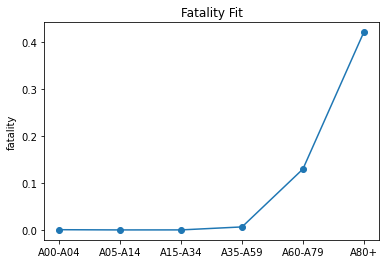

In [14]:
plt.plot(AllMeasured['Ages'],3*np.squeeze(M.Var['death_rate']().numpy()),'o-')
plt.ylabel('fatality')
plt.title('Fatality Fit')

Text(0.5, 1.0, 'Death-Time Fit')

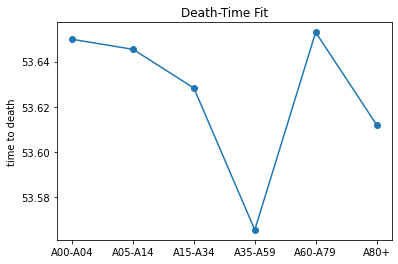

In [17]:
plt.plot(AllMeasured['Ages'],np.squeeze(M.Var['death_time']().numpy()),'o-')
plt.ylabel('time to death')
plt.title('Death-Time Fit')

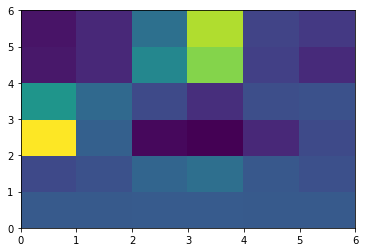

In [16]:
trans = M.Var['transmissionMatrix']().numpy()
plt.pcolormesh(trans)

In [5]:
q = M.getVarValueDict()
np.save(r'C:\Users\pi96doc\Documents\Programming\PythonScripts\StateModeling\Data\Test_InitialVars', q)

In [4]:
out = widgets.Output()
raw = SelectFilesButton()
widgets.VBox([raw, out])


In [6]:
raw.files

['C:/Users/pi96doc/Documents/Programming/PythonScripts/StateModeling/README.md']

In [4]:
q=M.assignNewVar('lambdaTVR', 0.2)
M.Var['lambdaTVR']()

<tf.Tensor: shape=(), dtype=float32, numpy=0.2>

In [9]:
print(M.Var['lambdaTVR']())
print(AllMeasured['Population'])
print(AllMeasured['Cases'][0])
# M.Res

tf.Tensor(0.01, shape=(), dtype=float32)
[[[ 4666637.06595626]
  [ 6629428.9206422 ]
  [24494838.06906303]
  [23934041.36957718]
  [15512062.18400966]
  [ 7891223.35256835]]]
[[[[ 31.04315992]
   [110.95250566]
   [602.05769801]
   [430.4626001 ]
   [102.27843787]
   [ 20.48536363]]]]


In [6]:
res=M.ResultVals()
#print(res)
print(res.keys())
print(res['cases'][0,0,0,0,0])
print(AllMeasured['Cases'][0,0,0,0,0])

dict_keys(['deaths', 'cases'])
tf.Tensor(7.867378, shape=(), dtype=float32)
31.04315991582007


In [4]:
# stm.Loss_FixedGaussian(np.squeeze(M.ResultVals()['deaths']), M.FitDict['deaths'])

loading preprocessed data ...
.done

using timestamp_death
Using measured date for deaths. No imputation
Unassigned Deaths: 424

Discarded : 3218 cases and 0 deaths as the start of desease was outside limits.
(230, 412, 7, 3)


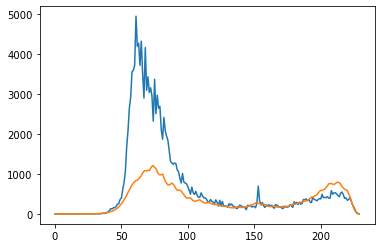

In [11]:
AllMeasured = loadData(useThuringia = False, pullData=False, correctDeaths=True, DeathData=DeathData, usePreprocessed=usePreprocessed)
print(AllMeasured['Cases'].shape)
# AllMeasured = preprocessData(AllMeasured, ReduceDistricts=["SK Jena", "LK Sonneberg"], SumDistricts=False, SumAges=True, SumGender=True)


In [15]:
AllMeasured = preprocessData(AllMeasured, ReduceDistricts=ExampleRegions, SumDistricts=True, SumAges=True, SumGender=True)


In [16]:
print(AllMeasured['Cases'].shape)
print(AllMeasured['Dead'].shape)
print(AllMeasured['Ages'])
print(AllMeasured['Population'].shape)


(232, 1, 1, 1, 1)
(232, 1, 1, 1, 1)
['summed Ages']
(1, 1, 1)


In [17]:
ExampleRegions

['SK Gera',
 'LK Nordhausen',
 'SK Erfurt',
 'SK Suhl',
 'LK Weimarer Land',
 'SK Weimar',
 'LK Greiz',
 'LK Schmalkalden-Meiningen',
 'LK Eichsfeld',
 'LK Sömmerda',
 'LK Hildburghausen',
 'LK Saale-Orla-Kreis',
 'LK Kyffhäuserkreis',
 'LK Saalfeld-Rudolstadt',
 'LK Ilm-Kreis',
 'LK Unstrut-Hainich-Kreis',
 'LK Gotha',
 'LK Sonneberg',
 'SK Eisenach',
 'LK Altenburger Land',
 'LK Wartburgkreis']

In [17]:
M.Var['R']().shape

TensorShape([125, 1, 1, 1])

In [28]:
#interact_manual(showSim,
#        ymin=ymin,
#        ymax=ymax)

d = widgets.FloatLogSlider(0.06,min=-10,max=2.0,continuous_update=False)
r = widgets.FloatLogSlider(0.01,min=-10,max=2.0,continuous_update=False)
uiS = widgets.HBox((d,r))
allSimWidgets = {'d':d}
print('Simulation Control:')
    
d.observe(assignParam, names='value')
# d.observe(showSimRes, names='value')
# outS = widgets.interactive_output(assignParam, allSimWidgets)
display(uiS, outS)

ymin = widgets.FloatLogSlider(0.001,min=-10,max=3,continuous_update=False)
ymax = widgets.FloatLogSlider(30.0,min=-10,max=3,continuous_update=False)
ui = widgets.HBox((ymin,ymax))
allWidgets = {'ymin': ymin, 'ymax': ymax}
out = widgets.interactive_output(showSimRes, allWidgets)

# out.layout.width = '700px';out.layout.height = '350px'
display(ui, out)

ymin = widgets.FloatLogSlider(0.0001,min=-10,max=6.0,continuous_update=False)
ymax = widgets.FloatLogSlider(0.01,min=-10,max=2.0,continuous_update=False)
ui = widgets.HBox((ymin,ymax))
allWidgets = {'ymin': ymin, 'ymax': ymax}
out2 = widgets.interactive_output(showSimStates, allWidgets)
#out2.layout.width = '700px';out2.layout.height = '350px'
#display(ui, out2)


Simulation Control:


Output(outputs=({'output_type': 'stream', 'text': 'd: 0.039810717055349734\nLoss is: tf.Tensor(0.000104670384,…

Output()

AttributeError: dtype

In [5]:
import os
os.getcwd()

'C:\\Users\\pi96doc\\Documents\\Programming\\PythonScripts\\StateModeling'

In [8]:
from ipywidgets import widgets, Layout
from IPython.display import display
item_layout = Layout(
    display='flex',flex_flow='row',
    justify_content='space-between'
)
box_layout=Layout(
    display='flex',flex_flow='column',
    border='solid 2px',align_items='stretch',width='50%')
tickLayout = Layout(display='flex', width='30%')
inFitWidget = widgets.Checkbox(value=True, indent=False, layout=tickLayout, description='Country')
drop = widgets.Dropdown(options=['a','b'], indent=False, value='a')
dropWidget = widgets.HBox((inFitWidget, drop), display='flex', layout = item_layout)
valueWidget = widgets.FloatLogSlider(value=1.0,base=10,min=-7,max=1)
boxWidget = widgets.HBox((Label('Hi'),valueWidget),layout=item_layout)
# valueWidget = widgets.HBox((inFitWidget,valueWidget))
widget = widgets.Box((dropWidget, boxWidget), layout=box_layout)
display(widgets.HBox((widget,widget,widget, widget)))

In [4]:
Filename

'C:\\Users\\pi96doc\\Documents\\Programming\\PythonScripts\\StateModeling\\Data\\PreprocessedMeasured_AFalse_GTrue'

In [10]:
def showSimRes(ymin=0.0001,ymax=1.0):
    doFit()
    p=M.showResultsBokeh(title=AllMeasured['Region'], Scale=PopSum, ylabel='fraction', 
                  xlim=xlim, dims=("District"), subPlot='cases',
                  legendPlacement='upper right',figsize=[10,5], Dates=AllMeasured['Dates'])
    p=M.showResultsBokeh(title=AllMeasured['Region'], Scale=PopSum, ylabel='fraction', 
                  xlim=xlim, dims=("District"), subPlot='hospitalization',
                  legendPlacement='upper right',figsize=[10,5], Dates=AllMeasured['Dates'])
    p=M.showResultsBokeh(title=AllMeasured['Region'], Scale=PopSum, ylabel='fraction', 
                  xlim=xlim, dims=("District"), subPlot='deaths', 
                  legendPlacement='upper right',figsize=[10,5], Dates=AllMeasured['Dates'])
    return p


In [5]:
g['T0'].children[1].value

0

In [18]:
M.Var['T0']()

<tf.Tensor: shape=(1, 2, 1, 1), dtype=float32, numpy=
array([[[[2.5118864e-06]],

        [[7.1999998e+00]]]], dtype=float32)>

In [7]:
from ipywidgets import interact
import numpy as np
import pandas as pd

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
#Dates = M.getDates(AllMeasured['Dates'],y)
#Dates = pd.to_datetime(Dates, dayfirst=True)

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef', name='Blubb') # , x_axis_type='datetime'
# r = p.line(pd.to_datetime(Dates), y, color="#8888cc", line_width=1.5, alpha=0.8)
# r = p.vbar_stack([x], y=[y-0.5], color="#8888cc")
r = p.vbar('x', top='y',color="#cc8800", alpha=0.4, source=source, name='Hi there')
# r = p.vbar(x, top=y+1, width=0.15, color="#8888cc", alpha=0.6)
p.xaxis.axis_label = 'Hi'
q=show(p, notebook_handle=True)
# pd.date_range(start=Dates[0], periods=toPlot.shape[0]).map(lambda x: x.strftime('%d.%m.%Y'))


ModuleNotFoundError: No module named 'bokeh.js'

In [48]:
# pd.to_datetime(Dates)
Dates = pd.date_range(start='14.02.2020', periods=x.shape[0]).map(lambda x: x.strftime('%d.%m.%Y'))

In [7]:
type(p)

bokeh.plotting.figure.Figure

In [6]:
from bokeh.io.notebook import CommsHandle
isinstance(q,CommsHandle)

False

In [9]:
type(p)

bokeh.plotting.figure.Figure

In [5]:
from bokeh.plotting import figure, output_notebook, show # output_file, 

# prepare some data
x = [1, 2, 3, 4, 5]
y = [3, 7, 2, 4, 5]

# output to static HTML file
# output_file("lines.html")
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Temp.", line_width=2)

# show the results
show(p)

Loading BokehJS ...